# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import urllib
import seaborn as sns
from citipy import citipy

In [2]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities =[]

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.00, high=90.00, size=1500)
lngs = np.random.uniform(low=-180.00, high=180.00, size=1500)
lat_lngs = zip(lats, lngs)

In [4]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

In [5]:
api_key = "10dd2e4737891459e8bba1ba60b84279"

url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
print(url)

https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10dd2e4737891459e8bba1ba60b84279


In [6]:
#city_url

In [7]:
#response = requests.get(city_url)

In [8]:
#response.json()["coord"]

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
city_data = []

In [10]:
print("Beginning Data Retrieval")
print("------------------------")

record_count = 1
set_count = 1

for i, city in enumerate(cities):
    
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
    city_url = url + "&q=" + urllib.request.pathname2url(city)
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    print(city_url)
    
    record_count += 1
    
    try: 
        city_weather = requests.get(city_url).json()
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        city_data.append({"City": city,
                         "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
     
        
    except:
        print("City not found. Skipping...")
   
        
print("------------------------")
print("Data Retrieval Complete")
print("------------------------")

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | kapaa
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10dd2e4737891459e8bba1ba60b84279&q=kapaa
Processing Record 2 of Set 1 | delicias
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10dd2e4737891459e8bba1ba60b84279&q=delicias
Processing Record 3 of Set 1 | souillac
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10dd2e4737891459e8bba1ba60b84279&q=souillac
Processing Record 4 of Set 1 | nioro
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10dd2e4737891459e8bba1ba60b84279&q=nioro
Processing Record 5 of Set 1 | puerto ayora
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10dd2e4737891459e8bba1ba60b84279&q=puerto%20ayora
Processing Record 6 of Set 1 | bairiki
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10dd2e4737891459e8bba1ba60b84279&q=bairiki
City not found. Skipping...
Processi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
city_data_pd = pd.DataFrame(city_data)
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,kapaa,20,US,1572388132,74,22.08,-159.32,84.20,9.17
1,delicias,0,MX,1572388245,22,28.20,-105.47,74.23,8.70
2,souillac,90,FR,1572388408,93,45.60,-0.60,59.00,3.36
3,nioro,53,GM,1572388430,21,13.79,-15.05,80.51,1.77
4,puerto ayora,40,EC,1572388431,61,-0.74,-90.35,78.80,8.05


In [27]:
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

In [28]:
city_data_pd.count()

City          545
Cloudiness    545
Country       545
Date          545
Humidity      545
Lat           545
Lng           545
Max Temp      545
Wind Speed    545
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

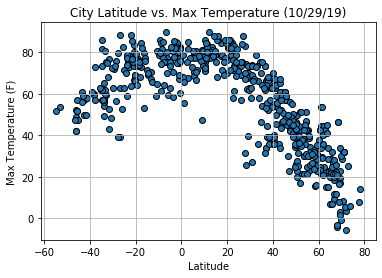

In [29]:
plt.scatter(lats, max_temps,
           edgecolor="black", linewidth=1, marker="o"
           , label="Cities")

plt.title(f"City Latitude vs. Max Temperature ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)


plt.show()

#### Latitude vs. Humidity Plot

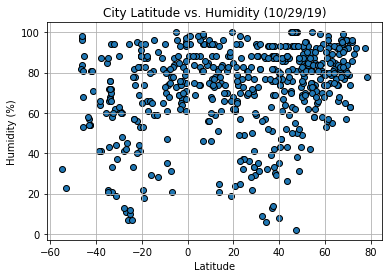

In [30]:
plt.scatter(lats, humidity,
           edgecolor="black", linewidth=1, marker="o"
           , label="Cities")

plt.title(f"City Latitude vs. Humidity ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.show()

#### Latitude vs. Cloudiness Plot

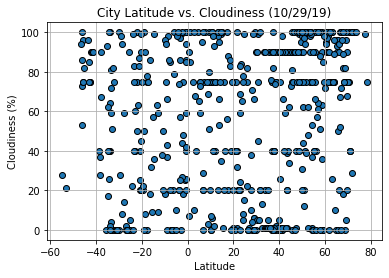

In [31]:
plt.scatter(lats, cloudiness, 
           edgecolor="black", linewidth=1, marker="o"
           , label="Cities")

plt.title(f"City Latitude vs. Cloudiness ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.show()

#### Latitude vs. Wind Speed Plot

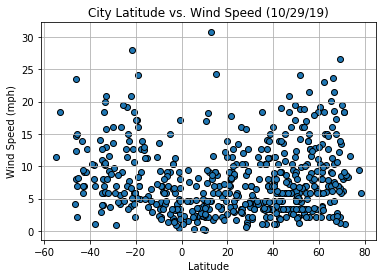

In [32]:
plt.scatter(lats, wind_speed, 
           edgecolor="black", linewidth=1, marker="o",
            label="Cities")

plt.title(f"City Latitude vs. Wind Speed ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.show()